# Projeto 1 - Ciência dos Dados

Nome: Carlos Galvao

Nome: Pedro Hun

Nome: Luiz Gustavo Reis

Atenção: Serão permitidos grupos de três pessoas, mas com uma rubrica mais exigente. Grupos deste tamanho precisarão fazer um questionário de avaliação de trabalho em equipe

___
Carregando algumas bibliotecas:

In [69]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import emoji
import functools
import operator

In [70]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\lugus\OneDrive\Documentos\Projeto1-Cdados\cdadosCGLR-1\Projeto1-Cdados


Carregando a base de dados com os tweets classificados como relevantes e não relevantes:

In [71]:
filename = 'pringles_1000.xlsx'

In [72]:
train = pd.read_excel(filename, sheet_name = 'Treinamento')
train.drop('Legenda', axis=1, inplace=True)
train.head(5)

,Treinamento,Classificação
0,se deixar eu vivo a vida só comendo pringles,1
1,senhor tira essa vontade de comer batata pring...,1
2,tomando um vinho rosé e comendo pringles #quintou,1
3,segui hj alimentação que a nutri passou e cagu...,0
4,@pringles_007 @conversasboas vc me dá bolo até...,0


In [73]:
test = pd.read_excel(filename, sheet_name = 'Teste')
test.drop('Legenda', axis=1, inplace=True)
test.head(5)

,Teste,Classificação
0,eu jantei dois pacotes de miojo\ncomi um punha...,2.0
1,n sei onde dea enfiou minha pringles,0.0
2,comprei 2 pringles vou levar anos pra me recup...,2.0
3,@bhaktsehgal @alamg33r @devrajin_1 @a_grvp_ @s...,0.0
4,"@underpantsus eu tbm não esperava, achei que f...",0.0


___
## Classificador automático de sentimento


Faça aqui uma descrição do seu produto e o que considerou como relevante ou não relevante na classificação dos tweets.

ESCREVA AQUI...

Irrelevante para tweets sem relacao nenhuma com a qualidade do produto.
Pouco Relevante para tweets com pouca relacao com a qualidade do produto.
Relevante para tweets com relacao com a qualidade do produto.
Muito Relevante para tweets com muita relacao com a qualidade do produto.

___
### Montando um Classificador Naive-Bayes

Considerando apenas as mensagens da planilha Treinamento, ensine  seu classificador.

In [74]:
## Limpezas: Minusculo - Emojis(emoji) - Pontuacoes(re) - StopWords; (nltk)

In [75]:
def pontuacao(text):
    text = text.replace('\n',' ')
    punctuation = '[!-.:?;]'
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, '', text)
    return text_subbed

def minusculo(text):
    text_subbed = text.lower()
    return text_subbed

def emojiseparar(em):
    em_split_emoji = emoji.get_emoji_regexp().split(em)
    em_split_whitespace = [substr.split() for substr in em_split_emoji]
    em_split = functools.reduce(operator.concat, em_split_whitespace)
    text_subbed = ' '.join(em_split)
    return text_subbed

def arroba(text):
    punctuation = r'@\w+'
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, '', text)
    return text_subbed

def limpar(text):
    text = pontuacao(text)
    text = minusculo(text)
#    text = emojiseparar(text)
    text = arroba(text)
    return text

test.Teste = test.Teste.apply(limpar)
train.Treinamento = train.Treinamento.apply(limpar)

In [93]:
filtra_linhas = test['Classificação'] == 0
irrelevante = test.loc[filtra_linhas, :]
todas_palavras_irrelevante = []
for tweet in irrelevante['Teste']:
        lista_i = tweet.split()
        for palavra in lista_i:
            todas_palavras_irrelevante.append(palavra)

serie_todas_palavras_irrelevante = pd.Series(todas_palavras_irrelevante)
tabela_todas_palavras_irrelevante = serie_todas_palavras_irrelevante.value_counts(True)
tabela_todas_palavras_irrelevante
        

pringles        0.057373
de              0.041685
e               0.027790
o               0.024204
que             0.020170
                  ...   
pfvv            0.000448
manhã           0.000448
vi              0.000448
“surpresaaa”    0.000448
¿dormir         0.000448
Length: 962, dtype: float64

In [94]:
filtra_linhas = test['Classificação'] == 1
pouco_relevante = test.loc[filtra_linhas, :]
todas_palavras_pouco_relevante = []
for tweet in pouco_relevante['Teste']:
        lista_pr = tweet.split()
        for palavra in lista_pr:
            todas_palavras_pouco_relevante.append(palavra)

serie_todas_palavras_pouco_relevante = pd.Series(todas_palavras_pouco_relevante)
tabela_todas_palavras_pouco_relevante = serie_todas_palavras_pouco_relevante.value_counts(True)
tabela_todas_palavras_pouco_relevante

pringles                 0.074016
de                       0.051969
e                        0.034646
eu                       0.017323
é                        0.017323
                           ...   
gastar                   0.001575
índias                   0.001575
2                        0.001575
chega                    0.001575
https//tco/39a30ozqix    0.001575
Length: 359, dtype: float64

In [95]:
filtra_linhas = test['Classificação'] == 2
relevante = test.loc[filtra_linhas, :]
todas_palavras_relevante = []
for tweet in relevante['Teste']:
        lista_pr = tweet.split()
        for palavra in lista_pr:
            todas_palavras_relevante.append(palavra)

serie_todas_palavras_relevante = pd.Series(todas_palavras_relevante)
tabela_todas_palavras_relevante = serie_todas_palavras_relevante.value_counts(True)
tabela_todas_palavras_relevante

pringles      0.066635
de            0.051040
e             0.035444
eu            0.020321
que           0.019376
                ...   
passo         0.000473
viciante      0.000473
[mercado      0.000473
bug           0.000473
saborizada    0.000473
Length: 833, dtype: float64

In [96]:
filtra_linhas = test['Classificação'] == 3
muito_relevante = test.loc[filtra_linhas, :]
todas_palavras_muito_relevante = []
for tweet in muito_relevante['Teste']:
        lista_pr = tweet.split()
        for palavra in lista_pr:
            todas_palavras_muito_relevante.append(palavra)

serie_todas_palavras_muito_relevante = pd.Series(todas_palavras_muito_relevante)
tabela_todas_palavras_muito_relevante = serie_todas_palavras_muito_relevante.value_counts(True)
tabela_todas_palavras_muito_relevante

pringles     0.085492
de           0.048575
e            0.036269
é            0.031736
eu           0.021373
               ...   
gostei       0.000648
🥰            0.000648
asismqnue    0.000648
certas       0.000648
parecia      0.000648
Length: 548, dtype: float64

In [98]:
todas_palavras = []
for tweet in test['Teste']:
    lista_p = tweet.split()
    for palavra in lista_p:
        todas_palavras.append(palavra)
        

serie_todas_palavras = pd.Series(todas_palavras)
tabela_todas_palavras = serie_todas_palavras.value_counts(True)
tabela_todas_palavras

pringles      0.068739
de            0.047306
e             0.032915
eu            0.019902
que           0.019137
                ...   
mass          0.000153
época         0.000153
espumante     0.000153
fudido        0.000153
saborizada    0.000153
Length: 1867, dtype: float64

In [99]:
prob_0 = len(todas_palavras_irrelevante)/len(todas_palavras)
prob_0

0.3415492957746479

In [100]:
prob_1 = len(todas_palavras_pouco_relevante)/len(todas_palavras)
prob_1

0.09721371708511942

In [101]:
prob_2 =  len(todas_palavras_relevante)/len(todas_palavras)
prob_2

0.323943661971831

In [102]:
prob_3 =  len(todas_palavras_muito_relevante)/len(todas_palavras)
prob_3

0.23637477036129823

In [103]:
a = prob_0 + prob_1 + prob_2 + prob_3
print(a)

0.9990814451928964


In [104]:
lista_todas_as_listas = [todas_palavras_irrelevante, todas_palavras_pouco_relevante, todas_palavras_relevante, todas_palavras_muito_relevante]
lista_todas_as_tabelas = [tabela_todas_palavras_irrelevante, tabela_todas_palavras_pouco_relevante, tabela_todas_palavras_relevante, tabela_todas_palavras_muito_relevante]

In [120]:
def prob(tweet,lista_todas_as_tabelas, lista_todas_as_listas):
    probability = 1
    lista_funcao = []
    for tabela_relativa in lista_todas_as_tabelas:
        contador_1 = 0
        multiplicador = 1
        for lista in lista_todas_as_listas:
            for palavra in tweet.split():
                if contador_1 >= len(tweet.split()) :
                    break
                if palavra in tabela_relativa:
                    probability = (1 + tabela_relativa[palavra])
                    contador_1 +=1
                else:
                    probabilidade = 1
                    contador_1 +=1
                multiplicador *= probability
        lista_funcao.append(multiplicador)
    if lista_funcao.index(max(lista_funcao)) == 0:
        return 'irrelevante'
    elif lista_funcao.index(max(lista_funcao)) == 1:
        return 'pouco relevante'
    elif lista_funcao.index(max(lista_funcao)) == 2:
        return 'relevante'
    elif lista_funcao.index(max(lista_funcao)) == 3:
        return 'muito relevante'
    
print(prob('pringles',lista_todas_as_tabelas,lista_todas_as_listas))



muito relevante


In [106]:
lista_classificador= []
for a in train['Treinamento']:
    lista_classificador.append(prob(a,lista_todas_as_tabelas,lista_todas_as_listas))
train['pc classifica'] = lista_classificador
train.head(50)

,Treinamento,Classificação,pc classifica
0,se deixar eu vivo a vida só comendo pringles,1,muito relevante
1,senhor tira essa vontade de comer batata pring...,1,relevante
2,tomando um vinho rosé e comendo pringles quintou,1,muito relevante
3,segui hj alimentação que a nutri passou e cagu...,0,muito relevante
4,vc me dá bolo até em filme q é por chamada i...,0,pouco relevante
5,eu digo svv pq viver em uma sociedade em que u...,2,pouco relevante
6,vai me processar,0,relevante
7,euro tá 612 se for comprar 10 euros em prin...,2,muito relevante
8,comi uma pringles mega logo depois de jantar v...,1,muito relevante
9,pedi bis pringles e bombom paguei só 13 reais ...,0,pouco relevante


___
### Verificando a performance do Classificador

Agora você deve testar o seu classificador com a base de Testes.

In [107]:
lista_classificador= []
for a in test['Teste']:
    lista_classificador.append(prob(a,lista_todas_as_tabelas,lista_todas_as_listas))
test['pc classifica'] = lista_classificador
test.head(50)

,Teste,Classificação,pc classifica
0,eu jantei dois pacotes de miojo comi um punhad...,2.0,pouco relevante
1,n sei onde dea enfiou minha pringles,0.0,muito relevante
2,comprei 2 pringles vou levar anos pra me recup...,2.0,pouco relevante
3,🤣🤣🤣🤣🤣🤣🤣🤣 paisa paisa 🤣🤣🤣🤣🤣,0.0,irrelevante
4,eu tbm não esperava achei que fosse ser do xb...,0.0,relevante
5,abri o fini e coloquei uma batatinha pringles ...,3.0,pouco relevante
6,quem dera fosse só o pringles q está diminuindo,0.0,muito relevante
7,um cara pediu pra eu comprar um salgadinho pra...,2.0,muito relevante
8,comi 1 pringles de cheeseburguer q tem um puta...,3.0,irrelevante
9,o melhor pringles,3.0,muito relevante


In [108]:
def transforma_em_numero(classificacao):
    if classificacao == 'irrelevante':
        return 0
    elif classificacao == 'pouco relevante':
        return 1
    elif classificacao == 'relevante':
        return 2
    else:
        return 3
    
testado = []
for x in test['Classificação']:
    testado.append(x)

calculado = []
for y in test['pc classifica']:
    valor = transforma_em_numero(y)
    calculado.append(valor)

acertos = 0
total = 0
i=0
while i <= len(calculado)-1:
    if testado[i] == calculado[i]:
        acertos+=1
    total+=1
    i+=1

qualidade = (acertos/total)*100
print(" acertou em {}% das vezes".format(qualidade))

 acertou em 9.6% das vezes


In [119]:
fal_positivos = 0
verd_positivos = 0
i = 0
total = 0

while i < len(calculado):
    if calculado[i] == 2 or calculado[i] == 3:
        if testado[i] == 2 or testado[i] == 3: 
            verd_positivos +=1
        else: 
            fal_positivos += 1
    i+=1
    total+=1

fal_positivos *= 100
verd_positivos*= 100

fal_negativos = 0
verd_negativos = 0
i = 0
total = 0

while i < len(calculado):
    if calculado[i] == 2 or calculado[i] == 1: 
        if testado[i] == 2 or testado[i] == 1: 
            verd_negativos +=1
        else:
            fal_negativos += 1
    i+=1
    total+=1


fal_negativos *= 100
verd_negativos *= 100

print('Porcentagem de falsos negativos: {}%'.format(fal_negativos/total))
print('Porcentagem de verdadeiros negativos: {}%'.format(verd_negativos/total))
print('Porcentagem de falsos positivos: {}%'.format(fal_positivos/total))
print('Porcentagem de verdadeiros positivos: {}%'.format(verd_positivos/total))

Porcentagem de falsos negativos: 29.6%
Porcentagem de verdadeiros negativos: 12.8%
Porcentagem de falsos positivos: 34.8%
Porcentagem de verdadeiros positivos: 25.4%


___
### Concluindo

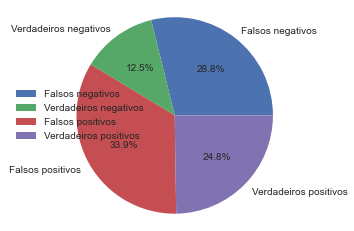

In [117]:
label = 'Falsos negativos', 'Verdadeiros negativos', 'Falsos positivos', 'Verdadeiros positivos'
sizes = [fal_negativos, verd_negativos, fal_positivos, verd_positivos]

fig1, ax1 = plt.subplots()
ax1.pie (sizes, labels=labels, autopct='%1.1f%%')

plt.legend(labels, loc=6)
ax1.axis('equal')
plt.show()

Não é possível alimentar nossa base de treinamento utilizando o próprio classificador, pois existe um alto índice de erro em nosso classificador, o que o coloca como ineficaz ou inválido para puxar tweets automaticamente. Provavelmente esse erro ocorre por conta da classificação feita a mão, na qual muitos tweets depende do contexto para serem classificados. Além de desconsideração da parte semântica da palavra

Frequentemente aplicado em processamento de linguagem natural e diagnósticos médicos. Assim como a resolução de problemas relacionados a texto é muito bem resolvida com a utilização do Naive Bayes. Classificação de textos, filtragem de SPAM e análise de sentimento em redes sociais são algumas das muitas aplicações para o algoritmo

Afim de tornar nosso classificador Naive Bayes é possivél fazer algumas mudanças importantes:
• Alterar a função principal, na qual é feita as probabilidades, afim de torna-lá mais verídica possível com um naive bayes de alta qualidade;
• É muito importante fazer uma pré seleção e uma pré análise de qualidade, por exemplo fazer uma pré classificação utilizando metódos concretos e facéis; 
• Além de fazer uma limpeza completa e bem feita na sua base de dados, para torna-lá o mais limpo possível;

In [121]:
Fontes: 
    https://www.digitalhouse.com/br/blog/naive-bayes
    https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/
    https://arxiv.org/pdf/1410.5329.pdf
        

SyntaxError: invalid syntax (<ipython-input-121-d0b193266666>, line 1)

___
### Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste

Caso for fazer esse item do Projeto

___
## Aperfeiçoamento:

Trabalhos que conseguirem pelo menos conceito B vão evoluir em conceito dependendo da quantidade de itens avançados:

* IMPLEMENTOU outras limpezas e transformações que não afetem a qualidade da informação contida nos tweets. Ex: stemming, lemmatization, stopwords
* CORRIGIU separação de espaços entre palavras e emojis ou entre emojis e emojis
* CRIOU categorias intermediárias de relevância baseadas na probabilidade: ex.: muito relevante, relevante, neutro, irrelevante, muito irrelevante. Pelo menos quatro categorias, com adição de mais tweets na base, conforme enunciado. (OBRIGATÓRIO PARA TRIOS, sem contar como item avançado)
* EXPLICOU porquê não pode usar o próprio classificador para gerar mais amostras de treinamento
* PROPÔS diferentes cenários para Naïve Bayes fora do contexto do projeto
* SUGERIU e EXPLICOU melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa)
* FEZ o item 6. Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste descrito no enunciado do projeto (OBRIGATÓRIO para conceitos A ou A+)

___
## Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**